In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Spam Data

Load the spam data set.
Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [2]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [3]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [4]:
spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts().to_dict().items())
ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts().to_dict().items())

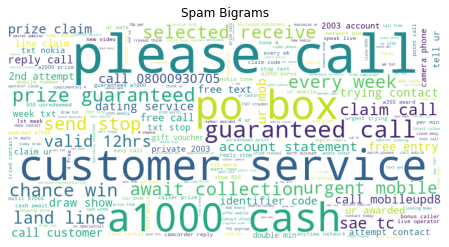

In [5]:
from wordcloud import WordCloud

data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Spam Bigrams')
plt.show()

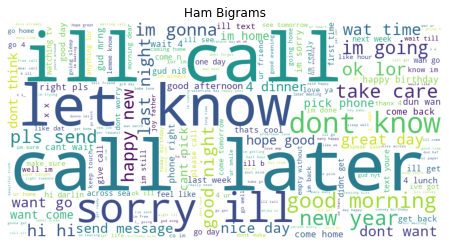

In [6]:
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Ham Bigrams')
plt.show()

### Is there any overlap in the bigrams for the spam data and the ham data?

In [7]:
overlap = set(spam_bigrams) & set(ham_bigrams)
overlap

{(('26th', 'july'), 1),
 (('3', 'week'), 1),
 (('4', '1'), 1),
 (('4', 'next'), 1),
 (('anyone', 'going'), 1),
 (('babe', 'make'), 1),
 (('back', 'id'), 1),
 (('bill', '3'), 1),
 (('call', 'text'), 1),
 (('called', 'left'), 1),
 (('chat', 'dont'), 1),
 (('come', 'take'), 1),
 (('could', 'meet'), 1),
 (('couple', 'day'), 1),
 (('day', 'fri'), 1),
 (('day', 'get'), 1),
 (('fall', 'love'), 1),
 (('free', 'next'), 1),
 (('get', 'phone'), 1),
 (('hey', 'got'), 1),
 (('hey', 'im'), 1),
 (('hey', 'really'), 1),
 (('hi', 'ya'), 1),
 (('hot', 'sticky'), 1),
 (('im', 'hot'), 1),
 (('ive', 'found'), 1),
 (('know', 'someone'), 1),
 (('left', 'message'), 1),
 (('let', 'send'), 1),
 (('like', 'see'), 1),
 (('link', 'sent'), 1),
 (('little', 'time'), 1),
 (('live', 'im'), 1),
 (('maybe', 'even'), 1),
 (('message', 'right'), 1),
 (('movie', 'collect'), 1),
 (('msg', 'dont'), 1),
 (('next', 'month'), 1),
 (('next', 'year'), 1),
 (('night', 'ur'), 1),
 (('ok', 'mobile'), 1),
 (('one', 'know'), 1),
 (('p

### Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [8]:
spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts().to_dict().items())
ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts().to_dict().items())

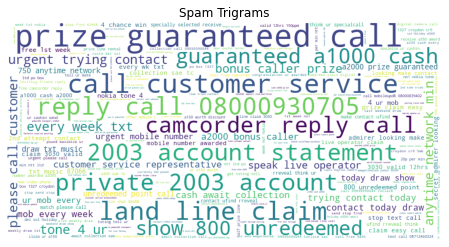

In [9]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_trigrams}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Spam Trigrams')
plt.show()

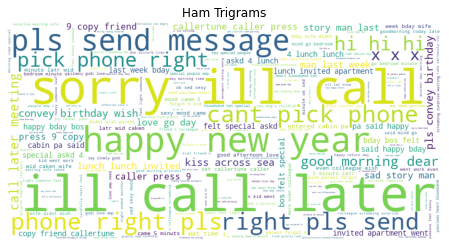

In [10]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Ham Trigrams')
plt.show()

### Explore the blog articles using the techniques discussed in the exploration lesson.

In [51]:
blogs_df = prepare.prepare_codeup_df()
blogs_df.head()

,title,original,clean,stemmed,lemmatized
0,What Jobs Can You Get After a Coding Bootcamp?...,Have you been considering a career in Cloud Ad...,considering career cloud administration idea j...,consid career cloud administr idea job titl po...,considering career cloud administration idea j...
1,What Jobs Can You Get After a Coding Bootcamp?...,If you are interested in embarking on a career...,interested embarking career tech youre probabl...,interest embark career tech your probabl wonde...,interested embarking career tech youre probabl...
2,Is Our Cloud Administration Program Right for ...,Changing careers can be scary. The first thing...,changing careers scary first thing may asking ...,chang career scari first thing may ask begin l...,changing career scary first thing may asking b...
3,5 Reasons To Attend Our New Cloud Administrati...,Come Work In The Cloud\nWhen your Monday rolls...,come work cloud monday rolls around start get ...,come work cloud monday roll around start get s...,come work cloud monday roll around start get s...
4,What Jobs Can You Get After a Coding Bootcamp?...,Have you been considering a career in Cloud Ad...,considering career cloud administration idea j...,consid career cloud administr idea job titl po...,considering career cloud administration idea j...


In [52]:
all_words = clean(' '.join(blogs_df.clean))
all_words

['considering',
 'career',
 'cloud',
 'administration',
 'idea',
 'job',
 'title',
 'potential',
 'salary',
 'could',
 'continue',
 'reading',
 'find',
 'miniseries',
 'take',
 'program',
 'codeup',
 'data',
 'science',
 'web',
 'development',
 'cloud',
 'administration',
 'outline',
 'respectively',
 'potential',
 'job',
 'title',
 'well',
 'entrylevel',
 'salary',
 'let',
 'discus',
 'cloud',
 'administration',
 'program',
 'overview',
 'codeup',
 'offer',
 '15week',
 'cloud',
 'administration',
 'program',
 'derived',
 'previous',
 'two',
 'program',
 'system',
 'engineering',
 'cyber',
 'cloud',
 'combined',
 'best',
 'blended',
 'handson',
 'practical',
 'knowledge',
 'skilled',
 'instructor',
 'create',
 'cloud',
 'administration',
 'program',
 'upon',
 'completing',
 'program',
 'youll',
 'opportunity',
 'take',
 'two',
 'exam',
 'certification',
 'amazon',
 'web',
 'service',
 'aws',
 'cloud',
 'practitioner',
 'aws',
 'solution',
 'architect',
 'associate',
 'potential',
 'job

In [53]:
blogs_freq = pd.Series(all_words).value_counts()
blogs_freq.head()

cloud      165
program     71
data        66
career      61
codeup      52
dtype: int64

<AxesSubplot:>

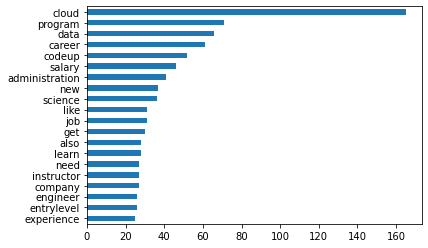

In [54]:
blogs_freq.head(20).sort_values().plot.barh()

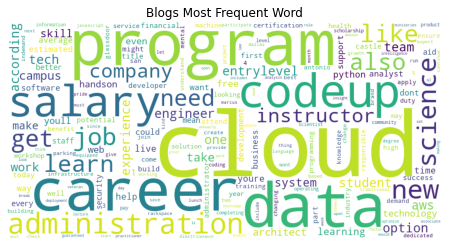

In [55]:
data = {k: v for k, v in blogs_freq.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Blogs Most Frequent Word')
plt.show()

In [56]:
blogs_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts().to_dict().items())

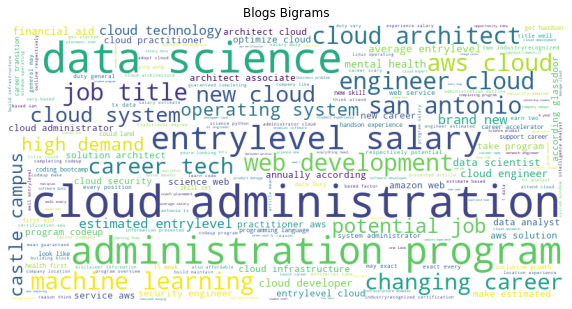

In [64]:
data = {k[0] + ' ' + k[1]: v for k, v in blogs_bigrams}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Blogs Bigrams')
plt.show()

In [58]:
blogs_trigrams = (pd.Series(nltk.ngrams(all_words, 3))
                      .value_counts().to_dict().items())

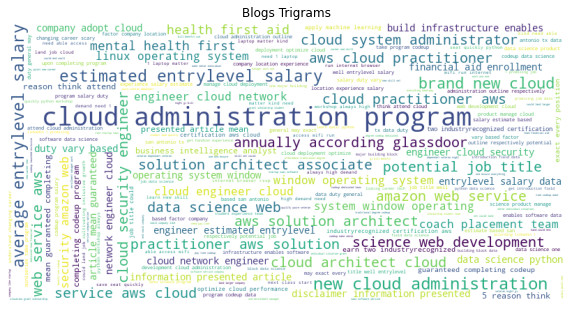

In [63]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in blogs_trigrams}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Blogs Trigrams')
plt.show()

### Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [11]:
news_df = prepare.prepare_news_df()
news_df.head()

,title,original,category,clean,stemmed,lemmatized
0,Veteran Bollywood singer Bhupinder Singh passe...,Veteran Bollywood playback and ghazal singer B...,national,veteran bollywood playback ghazal singer bhupi...,veteran bollywood playback ghazal singer bhupi...,veteran bollywood playback ghazal singer bhupi...
1,West can't isolate Russia & reverse its develo...,Russian President Vladimir Putin said on Monda...,national,russian president vladimir putin said monday '...,russian presid vladimir putin said monday ' im...,russian president vladimir putin said monday '...
2,CBI arrests 8 persons for alleged malpractices...,The Central Bureau of Investigation (CBI) arre...,national,central bureau investigation cbi arrested eigh...,central bureau investig cbi arrest eight peopl...,central bureau investigation cbi arrested eigh...
3,"If I get 20 minutes with Virat Kohli, I might ...","Amid Virat Kohli's poor form, Sunil Gavaskar s...",national,amid virat kohli ' poor form sunil gavaskar sa...,amid virat kohli ' poor form sunil gavaskar sa...,amid virat kohli ' poor form sunil gavaskar sa...
4,Report claims Ronaldo to join Sporting CP as c...,Manchester United forward Cristiano Ronaldo ha...,national,manchester united forward cristiano ronaldo br...,manchest unit forward cristiano ronaldo brand ...,manchester united forward cristiano ronaldo br...


In [14]:
all_words = clean(' '.join(news_df.clean))
all_words

['veteran',
 'bollywood',
 'playback',
 'ghazal',
 'singer',
 'bhupinder',
 'singh',
 'passed',
 'away',
 'colon',
 'ailment',
 '82',
 'mumbai',
 'singh',
 'known',
 'song',
 'like',
 'naam',
 'gum',
 'jayega',
 'kabhi',
 'kisi',
 'ko',
 'mukammal',
 'jahan',
 'nahi',
 'milta',
 'hothon',
 'pe',
 'aisi',
 'baat',
 'also',
 'credited',
 'guitarist',
 'famous',
 'bollywood',
 'song',
 'like',
 'dum',
 'maro',
 'dum',
 'mehbooba',
 'mehbooba',
 'russian',
 'president',
 'vladimir',
 'putin',
 'said',
 'monday',
 'impossible',
 'west',
 'isolate',
 'russia',
 'rest',
 'world',
 'reverse',
 'country',
 'development',
 'back',
 'decade',
 'putin',
 'added',
 'russia',
 'develop',
 'domestic',
 'technology',
 'western',
 'country',
 'including',
 'u',
 'uk',
 'imposed',
 'several',
 'financial',
 'sanction',
 'russia',
 'following',
 'invasion',
 'ukraine',
 'central',
 'bureau',
 'investigation',
 'cbi',
 'arrested',
 'eight',
 'people',
 'monday',
 'alleged',
 'malpractice',
 'neet',
 'ug',

In [32]:
news_freq = pd.Series(all_words).value_counts()
news_freq.head()

said      192
monday    120
added      96
people     96
india      84
dtype: int64

<AxesSubplot:>

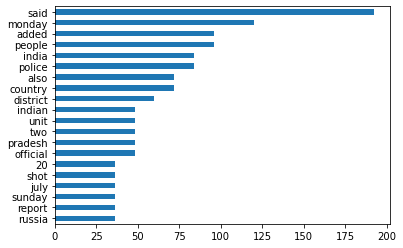

In [38]:
news_freq.head(20).sort_values().plot.barh()

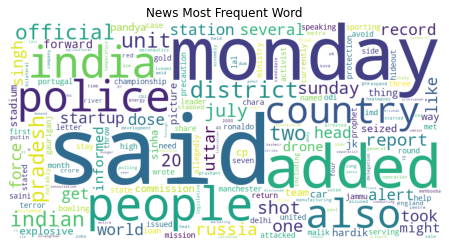

In [22]:
data = {k: v for k, v in news_freq.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('News Most Frequent Word')
plt.show()

In [44]:
news_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts().to_dict().items())

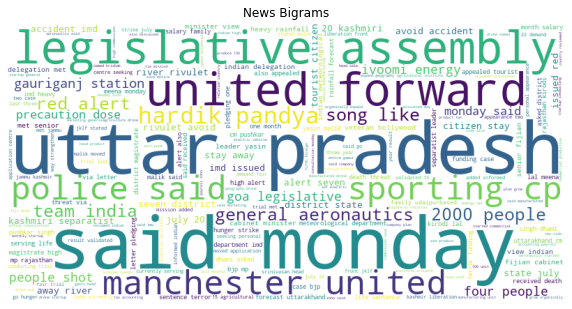

In [66]:
data = {k[0] + ' ' + k[1]: v for k, v in news_bigrams}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title('News Bigrams')
plt.show()

In [47]:
news_trigrams = (pd.Series(nltk.ngrams(all_words, 3))
                      .value_counts().to_dict().items())

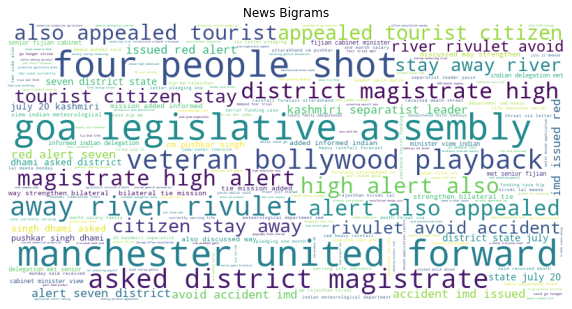

In [65]:
data = {k[0] + ' ' + k[1] + ' ' +k[2]: v for k, v in news_trigrams}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title('News Bigrams')
plt.show()